In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#file path
csv_path = "../Resources/crimedata_33556_3y.csv"
crime_data_df = pd.read_csv(csv_path)
crime_data_df.head(10)

,OBJECTID,Case Number,Crime Type,Crime Type Extension,Reported Date,Address,zip
0,1069444,2018-346852,THEFT,THEFT MOTOR VEHICLE PARTS,05/19/2018,8700 BLOCK NORTH MOBLEY RD,33556
1,1055999,2018-206522,DUI,DUI (DRIVING UNDER INFLUENCE),03/25/2018,EAGLES ENTRY DR / NINE EAGLES DR,33556
2,1078910,2018-451717,TRAFFIC,Property Damage,06/30/2018,TARPON SPRINGS RD / BLAKE RD,33556
3,1092103,2018-604188,TRAFFIC,Property Damage,08/30/2018,TARPON SPRINGS RD / BOY SCOUT RD,33556
4,1079700,2018-461245,TRAFFIC,Property Damage,07/04/2018,TARPON SPRINGS RD / OAKDALE RD,33556
5,1099869,2018-687788,BATTERY,BATTERY-SIMPLE,10/02/2018,16200 BLOCK ARMISTEAD LN,33556
6,1075083,2018-268603,TRAFFIC,Fatal Injury,06/13/2018,GUNN HW / COPELAND RD,33556
7,1116119,2018-855607,FRAUD,FRAUD-OTHER,12/11/2018,9100 BLOCK ROBERTS RD,33556
8,1079574,2018-458826,THEFT,THEFT VEHICLE & OTHER MOBILE,07/03/2018,8500 BLOCK GUNN HW,33556
9,1125628,2019-56072,TRAFFIC,Property Damage,01/24/2019,TARPON SPRINGS RD / TYLER RD,33556


In [2]:
#identify columns names used in the data
crime_data_df.columns

Index(['OBJECTID', 'Case Number', 'Crime Type', 'Crime Type Extension',
       'Reported Date', 'Address', 'zip'],
      dtype='object')

In [3]:
#remove some columns from the data 
reduced_crime_data_df = crime_data_df.loc[:, ['Reported Date', 'Case Number', 'Crime Type', 'Crime Type Extension'
       , 'zip']]
reduced_crime_data_df.head(10)

,Reported Date,Case Number,Crime Type,Crime Type Extension,zip
0,05/19/2018,2018-346852,THEFT,THEFT MOTOR VEHICLE PARTS,33556
1,03/25/2018,2018-206522,DUI,DUI (DRIVING UNDER INFLUENCE),33556
2,06/30/2018,2018-451717,TRAFFIC,Property Damage,33556
3,08/30/2018,2018-604188,TRAFFIC,Property Damage,33556
4,07/04/2018,2018-461245,TRAFFIC,Property Damage,33556
5,10/02/2018,2018-687788,BATTERY,BATTERY-SIMPLE,33556
6,06/13/2018,2018-268603,TRAFFIC,Fatal Injury,33556
7,12/11/2018,2018-855607,FRAUD,FRAUD-OTHER,33556
8,07/03/2018,2018-458826,THEFT,THEFT VEHICLE & OTHER MOBILE,33556
9,01/24/2019,2019-56072,TRAFFIC,Property Damage,33556


In [4]:
#columns to use in the table below 
columns = [
    "Reported Date", "Case Number", "Crime Type", "Crime Type Extension", "zip"
]
#create a new DF for non Traffic related crimes
data_crime_no_traffic_df = reduced_crime_data_df.loc[reduced_crime_data_df["Crime Type"] != "TRAFFIC", columns]
data_crime_no_traffic_df.head(10)


,Reported Date,Case Number,Crime Type,Crime Type Extension,zip
0,05/19/2018,2018-346852,THEFT,THEFT MOTOR VEHICLE PARTS,33556
1,03/25/2018,2018-206522,DUI,DUI (DRIVING UNDER INFLUENCE),33556
5,10/02/2018,2018-687788,BATTERY,BATTERY-SIMPLE,33556
7,12/11/2018,2018-855607,FRAUD,FRAUD-OTHER,33556
8,07/03/2018,2018-458826,THEFT,THEFT VEHICLE & OTHER MOBILE,33556
11,06/27/2019,2019-452882,BATTERY,BATTERY-SIMPLE,33556
15,05/14/2020,2020-319461,THEFT,GRAND THEFT - ALL OTHER,33556
16,07/01/2020,2020-427320,DUI,DUI (DRIVING UNDER INFLUENCE),33556
17,02/27/2018,2018-143877,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,33556
20,08/30/2018,2018-603131,BURGLARY,THEFT FROM A VEHICLE,33556


In [5]:
#count all non traffic related crimes
data_crime_no_traffic_df["Case Number"].count()

405

In [6]:
#list of crimes and count
crime_type = data_crime_no_traffic_df.groupby("Crime Type")
crime_type["Case Number"].count()

Crime Type
ARSON        2
ASSAULT      6
BATTERY     56
BURGLARY    60
DRUGS       38
DUI         41
FIRE         1
FRAUD       82
HARASS       3
MISCHIEF    34
MURDER       1
THEFT       81
Name: Case Number, dtype: int64

In [7]:
#dates when a crime had been recorded
crime_date = data_crime_no_traffic_df.groupby("Reported Date")
crime_date["Case Number"].count()

Reported Date
01/01/2020    1
01/03/2019    1
01/03/2020    1
01/05/2019    1
01/05/2020    1
             ..
12/28/2019    1
12/28/2020    1
12/29/2019    1
12/30/2018    1
12/31/2018    2
Name: Case Number, Length: 321, dtype: int64

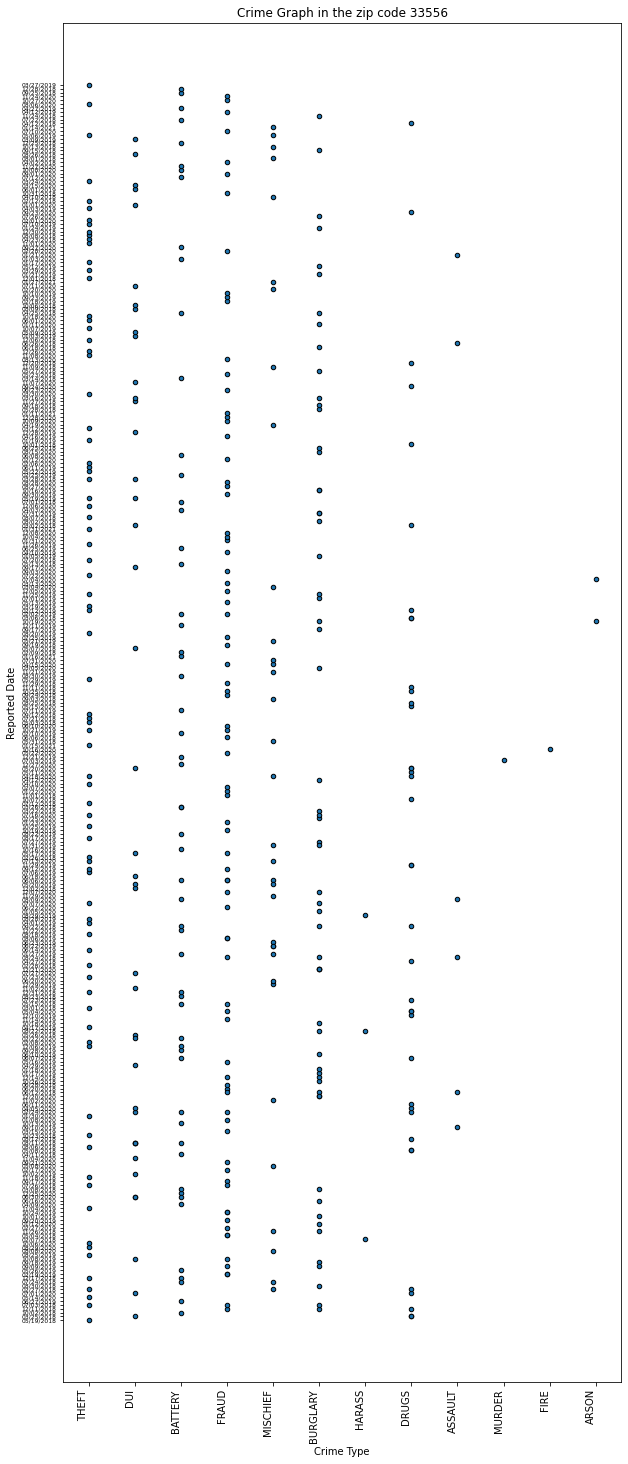

In [8]:
data_crime_no_traffic_df.plot(kind="scatter", x="Crime Type", y="Reported Date", figsize=(10,25),
                              facecolors="red", edgecolors="black", title="Crime Graph in the zip code 33556")
plt.xticks(rotation=90,  horizontalalignment='right', fontweight='light', fontsize='medium',)
plt.yticks(horizontalalignment='right', fontweight='light', fontsize=6)
plt.show()